In [1]:
# Using K-Means clustering to cluster Covid-19 cases in US counties

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Covid-19 cases in US
# link to data: https://github.com/nytimes/covid-19-data
data = pd.read_csv('us-counties.csv')
data

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
115452,2020-05-04,Sublette,Wyoming,56035.0,1,0
115453,2020-05-04,Sweetwater,Wyoming,56037.0,11,0
115454,2020-05-04,Teton,Wyoming,56039.0,67,1
115455,2020-05-04,Uinta,Wyoming,56041.0,6,0


In [3]:
# Since the original data doesn't have longitudes and latitudes of the counties, I have to use this to merge the longitudes and latitudes
# Link to data: https://en.wikipedia.org/wiki/User:Michael_J/County_table
fips = pd.read_csv('fips.csv') 
fips

,State,FIPS,County,Latitude,Longitude
0,AL,1001,Autauga,32.536382,-86.644490
1,AL,1003,Baldwin,30.659218,-87.746067
2,AL,1005,Barbour,31.870670,-85.405456
3,AL,1007,Bibb,33.015893,-87.127148
4,AL,1009,Blount,33.977448,-86.567246
...,...,...,...,...,...
3138,WY,56037,Sweetwater,41.660339,-108.875676
3139,WY,56039,Teton,44.049321,-110.588102
3140,WY,56041,Uinta,41.284726,-110.558947
3141,WY,56043,Washakie,43.878831,-107.669052


In [4]:
# Merge based on same fips (counties) so each row in data has a longitude and latitude of the county
data = data.merge(fips, left_on='fips', right_on='FIPS') 
data

,date,county,state,fips,cases,deaths,State,FIPS,County,Latitude,Longitude
0,2020-01-21,Snohomish,Washington,53061.0,1,0,WA,53061,Snohomish,48.054913,-121.766412
1,2020-01-22,Snohomish,Washington,53061.0,1,0,WA,53061,Snohomish,48.054913,-121.766412
2,2020-01-23,Snohomish,Washington,53061.0,1,0,WA,53061,Snohomish,48.054913,-121.766412
3,2020-01-24,Snohomish,Washington,53061.0,1,0,WA,53061,Snohomish,48.054913,-121.766412
4,2020-01-25,Snohomish,Washington,53061.0,1,0,WA,53061,Snohomish,48.054913,-121.766412
...,...,...,...,...,...,...,...,...,...,...,...
114106,2020-05-04,Boone,Nebraska,31011.0,1,0,NE,31011,Boone,41.705400,-98.066794
114107,2020-05-04,McPherson,Nebraska,31117.0,1,0,NE,31117,McPherson,41.596473,-101.060237
114108,2020-05-04,De Baca,New Mexico,35011.0,1,0,NM,35011,De Baca,34.351429,-104.401527
114109,2020-05-04,Blaine,Oklahoma,40011.0,1,0,OK,40011,Blaine,35.877782,-98.428934


In [6]:
# drop unwanted columns
cleandata = data.drop(['date', 'fips', 'FIPS', 'deaths', 'cases', 'State', 'County', 'county', 'state'], axis=1)
cleandata

,Latitude,Longitude
0,48.054913,-121.766412
1,48.054913,-121.766412
2,48.054913,-121.766412
3,48.054913,-121.766412
4,48.054913,-121.766412
...,...,...
114106,41.705400,-98.066794
114107,41.596473,-101.060237
114108,34.351429,-104.401527
114109,35.877782,-98.428934


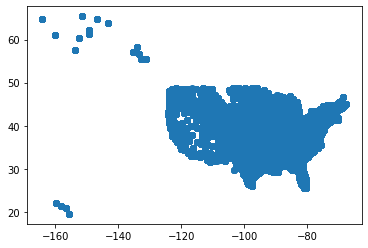

In [7]:
# This is what the plot of cleandata on XY graph looks like
# As you can see, covid-19 cases have been reported in most of the counties in the US
plt.scatter(cleandata['Longitude'], cleandata['Latitude'])

In [8]:
# Assign k=200
km = KMeans(n_clusters=200)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# Perform k-means clustering
clusters = km.fit_predict(cleandata[['Longitude', 'Latitude']])
clusters

array([103, 103, 103, ...,  17,  12, 161])

In [10]:
# Assign the cluster numbers to the data points
cleandata['Cluster'] = clusters
data['Cluster'] = clusters
data

,date,county,state,fips,cases,deaths,State,FIPS,County,Latitude,Longitude,Cluster
0,2020-01-21,Snohomish,Washington,53061.0,1,0,WA,53061,Snohomish,48.054913,-121.766412,103
1,2020-01-22,Snohomish,Washington,53061.0,1,0,WA,53061,Snohomish,48.054913,-121.766412,103
2,2020-01-23,Snohomish,Washington,53061.0,1,0,WA,53061,Snohomish,48.054913,-121.766412,103
3,2020-01-24,Snohomish,Washington,53061.0,1,0,WA,53061,Snohomish,48.054913,-121.766412,103
4,2020-01-25,Snohomish,Washington,53061.0,1,0,WA,53061,Snohomish,48.054913,-121.766412,103
...,...,...,...,...,...,...,...,...,...,...,...,...
114106,2020-05-04,Boone,Nebraska,31011.0,1,0,NE,31011,Boone,41.705400,-98.066794,58
114107,2020-05-04,McPherson,Nebraska,31117.0,1,0,NE,31117,McPherson,41.596473,-101.060237,112
114108,2020-05-04,De Baca,New Mexico,35011.0,1,0,NM,35011,De Baca,34.351429,-104.401527,17
114109,2020-05-04,Blaine,Oklahoma,40011.0,1,0,OK,40011,Blaine,35.877782,-98.428934,12


Text(0, 0.5, 'Latitude')

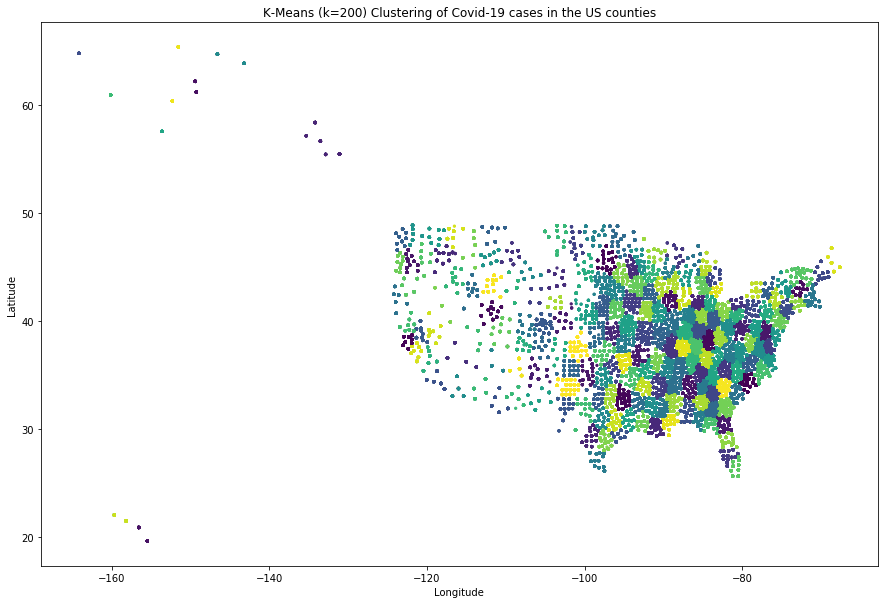

In [11]:
# Create a map of the datapoints and clusters
fig = plt.figure(figsize=[15, 10])
ax = fig.add_subplot(111)
scatter = ax.scatter(cleandata['Longitude'],cleandata['Latitude'], c=clusters,s=5)
ax.set_title('K-Means (k=200) Clustering of Covid-19 cases in the US counties')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

Summary & Results:

I used K-Means clustering on the counties in this data but it didn't have longitudes and latitudes so I found another dataset who contained US counties, county fips number and the longitudes and latitudes of the counties. So now I can merge the two datasets based on the fips on the counties since both datasets have fips column. So I got about 114,000 data points each with date, county, longitude, latitude, cases... etc.
I needed to decide on a k value and I tried couple different k values but decided to go with k=200. Since most the US poplation live is urban areas my assumption was that most of the cases will be in counties in urban areas. So, it seemed right for the clusters to cover different metropolitan areas in the US. Since there are 50 states, I predicted that on average most states will have about four main metorpolitan areas which is why I went with 200 clusters. Once the clusters were computed I assigned them to the data by appending the cluster cloumn. 

Next, I created a scatter plot of the longitude and latitude of the datapoints and the cluster they belonged to. As I expected, the graph ended up looking like the shape of US. You can clearly see the discrepancy in the amount of counties that have Covid-19 cases in different parts of the US. Each dot on the map represents a county. The northeast, southeast and midwest regions have a lot more counties with Covid-19 cases then northwest and southwest regions of the country. This was expected since the eastern region of the country is more populated then the western part. You can see from the graph that florida has 5 clusters. There is a cluster in dark blue where Miami is located. There are two clusters in shades of green in central Florida and two more clusters in northern Florida. There is a cluster in blue where New York City is located and then below that is another cluster in green in New Jersy. In the west coast there is cluster in green where San Francisco is located. And if you look south of that there is a cluster in yellow near LA. 